In [1]:
!pip install googlecolab

  Could not find a version that satisfies the requirement googlecolab (from versions: )
No matching distribution found for googlecolab
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:
!pip install tensorflow

  Stored in directory: C:\Users\jeshi\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: C:\Users\jeshi\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\jeshi\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built absl-py gast termcolor


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
!pip install keras

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Instructor Turn One-Hot Encoding

## Preprocessing Review

Why do we **preprocess** data when we build machine learning pipelines?

We preprocess data for two principle reasons:

1. To transform the data to better suit a model's underlying assumptions.
2. To format the data in the way a model expects.

Today, we're concerned with this second reason.

## Inputs to Neural Networks

What does the input to a neural network look like?

Inputs to neural networks are **vectors**. Each entry in the vector corresponds to a feature, which the net uses to make predictions. 

Crucially, these vectors contain can contain only _numerical_ data. They _cannot_ contain string data.

In [1]:
# Good!
good_input_row1 = [1.3, 2.2, 5.4, 5.8, 0]
good_input_row2 = [1.3, 2.2, 5.4, 5.8, 1]

In [2]:
# Bad...
bad_input_row1 = [1.3, 2.2, 5.4, 5.8, 'dog']
bad_input_row2 = [1.3, 2.2, 5.4, 5.8, 'cat']

## One-Hot Encoding

This poses a problem when we want to train a neural network on categorical data, such as the classic [Iris data set](https://archive.ics.uci.edu/ml/datasets/Iris

![](https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg)

In [3]:
import pandas as pd

# Read from: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=names)

In [4]:
# Note the entries `iris-virginica`
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Note that all of our data is numerical..._Except_ for the data in that `class` column, which contains strings.

The `class` column will contain one of three values:

1. `iris-setosa`
2. `iris-versicolour`
3. `iris-virginica`

As these are not numerical values, we can't use them to fit our nnet. To fix this, we must convert each class label to a numerical value.

We do this via the following steps:

1. **Label Encoding**. First, we convert the three possible classes to integer labels. E.g., `iris-setosa` will be `1`; `iris-versicolour`, `2`; and `iris-virginica`, `3`.
2. **One-Hot Encoding**. Then, we set each row's `class` value to an _array_. This array will have a `1` in whichever slot corresponds to the integer label. E.g., after one-hot encoding, a row with the class `iris-setosa` will have the array `[1, 0, 0]`. A row with class `iris-virginica`, the array `[0, 0, 1]`; etc.

In many cases, categories in the data sets you work with will already be label-encoded. In this case, you can apply one-hot encoding immediately.

## Applying One-Hot Encoding

In [5]:
# Step 0: Reformat data
data = df.values
X = data[:, 0:4]
y = data[:, 4]
print("X",X)
print("y",y)

X [[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 

In [6]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
print(y)
print(encoded_y)


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [7]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class: Iris-setosa
Encoded Label: 0
------------
Original Class

Note that each of the original labels has been replaced with an integer.

In [ ]:

from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

Using TensorFlow backend.


ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

SystemError: <class '_frozen_importlib._ModuleLockManager'> returned a result with an error set

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

One-Hot Encoding converts that numeric value to a one-hot encoded array. One-Hot Encoding avoids biasing the model by applying numeric classes.

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/


# Everyone Activity 2 Neural Networks with Keras


In [ ]:
# Generate some fake data with 3 features

from sklearn.datasets import make_classification

X, y = make_classification(n_features=3, n_redundant=0, n_informative=3,
                           random_state=42, n_classes=2, n_clusters_per_class=1)

y = y.reshape(-1, 1)

print(X.shape)
print(y.shape)

Use train_test_split to create training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Data Preprocessing

It is really important to scale our data before using multilayer perceptron models. 

Without scaling, it is often difficult for the training cycle to converge

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

Remember to scale both the training and testing data

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

One-hot encode the labels

In [ ]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

## Creating our Model

We must first decide what kind of model to apply to our data. 

For numerical data, we use a regressor model. 

For categorical data, we use a classifier model. 

In this example, we will use a classifier to build the following network:

![nnet.png](Images/nnet.png)

## Defining our Model Architecture (the layers)

We first need to create a sequential model

In [ ]:
from keras.models import Sequential

model = Sequential()

Next, we add our first layer. This layer requires you to specify both the number of inputs and the number of nodes that you want in the hidden layer.

In [ ]:
from keras.layers import Dense
number_inputs = 3
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

![first_layer](Images/nnet_first_layer.png)

Our final layer is the output layer. Here, we need to specify the activation function (typically `softmax` for classification) and the number of classes (labels) that we are trying to predict (2 in this example).

In [ ]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

![output_layer](Images/nnet_output_layer.png)

## Model Summary

In [ ]:
model.summary()

## Compile the Model

Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy.

In [ ]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model
Finally, we train our model using our training data

Training consists of updating our weights using our optimizer and loss function. In this example, we choose 1000 iterations (loops) of training that are called epochs.

We also choose to shuffle our training data and increase the detail printed out during each training cycle.

In [ ]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

## Quantifying the Model
We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [ ]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

## Making Predictions with new data

We can use our trained model to make predictions using `model.predict`

In [ ]:
import numpy as np
new_data = np.array([[0.2, 0.3, 0.4]])
print(f"Predicted class: {model.predict_classes(new_data)}")

# Everyone Do Activity 3 Deep Learning 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)

In [4]:
# Create Data
X, y = sklearn.datasets.make_circles(noise=0.05, factor=.2, random_state=1)

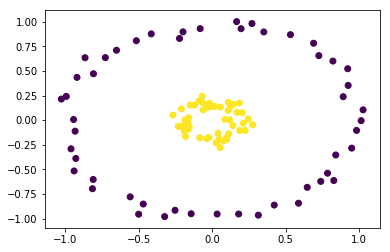

In [5]:
# Visualize Data
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

Using TensorFlow backend.


In [10]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 0.5680 - acc: 0.6667
Epoch 2/100
 - 0s - loss: 0.5669 - acc: 0.6667
Epoch 3/100
 - 0s - loss: 0.5657 - acc: 0.6667
Epoch 4/100
 - 0s - loss: 0.5647 - acc: 0.6667
Epoch 5/100
 - 0s - loss: 0.5635 - acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.5624 - acc: 0.6667
Epoch 7/100
 - 0s - loss: 0.5612 - acc: 0.6800
Epoch 8/100
 - 0s - loss: 0.5602 - acc: 0.6933
Epoch 9/100
 - 0s - loss: 0.5591 - acc: 0.7067
Epoch 10/100
 - 0s - loss: 0.5580 - acc: 0.7067
Epoch 11/100
 - 0s - loss: 0.5568 - acc: 0.7067
Epoch 12/100
 - 0s - loss: 0.5558 - acc: 0.7200
Epoch 13/100
 - 0s - loss: 0.5547 - acc: 0.7200
Epoch 14/100
 - 0s - loss: 0.5537 - acc: 0.7200
Epoch 15/100
 - 0s - loss: 0.5525 - acc: 0.7200
Epoch 16/100
 - 0s - loss: 0.5514 - acc: 0.7200
Epoch 17/100
 - 0s - loss: 0.5503 - acc: 0.7333
Epoch 18/100
 - 0s - loss: 0.5492 - acc: 0.7333
Epoch 19/100
 - 0s - loss: 0.5481 - acc: 0.7333
Epoch 20/100
 - 0s - loss: 0.5470 - acc: 0.7333
Epoch 21/100
 - 0s - loss: 0.5459 - acc: 0.7333
E

# Deep Learning
For this network, we simply add an additional hidden layer of 6 nodes

In [16]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [17]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 14        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [18]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 0.6183 - acc: 0.5067
Epoch 2/100
 - 0s - loss: 0.6154 - acc: 0.5333
Epoch 3/100
 - 0s - loss: 0.6126 - acc: 0.5333
Epoch 4/100
 - 0s - loss: 0.6101 - acc: 0.5333
Epoch 5/100
 - 0s - loss: 0.6075 - acc: 0.5333
Epoch 6/100
 - 0s - loss: 0.6047 - acc: 0.5333
Epoch 7/100
 - 0s - loss: 0.6021 - acc: 0.5333
Epoch 8/100
 - 0s - loss: 0.5992 - acc: 0.5333
Epoch 9/100
 - 0s - loss: 0.5966 - acc: 0.5467
Epoch 10/100
 - 0s - loss: 0.5938 - acc: 0.5600
Epoch 11/100
 - 0s - loss: 0.5910 - acc: 0.5733
Epoch 12/100
 - 0s - loss: 0.5885 - acc: 0.5733
Epoch 13/100
 - 0s - loss: 0.5856 - acc: 0.5733
Epoch 14/100
 - 0s - loss: 0.5828 - acc: 0.5867
Epoch 15/100
 - 0s - loss: 0.5799 - acc: 0.5867
Epoch 16/100
 - 0s - loss: 0.5772 - acc: 0.6133
Epoch 17/100
 - 0s - loss: 0.5740 - acc: 0.6133
Epoch 18/100
 - 0s - loss: 0.5709 - acc: 0.6133
Epoch 19/100
 - 0s - loss: 0.5677 - acc: 0.6267
Epoch 20/100
 - 0s - loss: 0.5643 - acc: 0.6667
Epoch 21/100
 - 0s - loss: 0.5607 - acc: 0.7067
E

# Compare the models below

In [19]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5199212431907654, Accuracy: 0.800000011920929


In [20]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.3295448422431946, Accuracy: 1.0


# In a nutshell...

![stack more layers](Images/stack-more-layers.jpg)

# Student Turn Activity 4 Moon

# Student Deep Learning Challenge

In this activity, you will create a regular Neural Network and a Deep Neural Network. Then, compare the accuracy of each.

## Instructions

* Create a Neural Network and Deep Neural Network Classifier that correctly classifies both moons from the dataset.

* Train both models using 100 training epochs.

* Compare the accuracy of both models.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)

In [ ]:
X, y = sklearn.datasets.make_moons(200, noise=0.05)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [ ]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from keras.utils import to_categorical

# One-hot encoding
# YOUR CODE HERE

In [ ]:
# First, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
# YOUR CODE HERE

In [ ]:
model.summary()

In [ ]:
# Compile the model
# YOUR CODE HERE

In [ ]:
# Fit the model to the training data
# YOUR CODE HERE

# Deep Learning
For this network, we simply add an additional hidden layer of 6 nodes

In [ ]:
# Create a deep learning model with an extra hidden layer of 6 nodes called `deep_model`
# YOUR CODE HERE

In [ ]:
deep_model.summary()

In [ ]:
# Compile and fit the deep_model
# YOUR CODE HERE

# Compare the models below

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

# Student Turn Activity 5 Deep Voice 

# Voice Gender Recognition

* In this activity, you will apply a deep learning neural network to predict the gender of a voice using acoustic properties of the voice and speech.

## Instructions

* Create a deep learning model with 2 hidden layers.  Each layer should have 100 nodes.

* Compile and fit the model.

* Quantify (score) the model.

* Use the first 5 testing data points to make predictions.  Then, compare the predictions to the actual labels.

- - -

In [22]:
# Dependencies
import numpy as np
import pandas as pd

# Voice Gender
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

## The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

In [23]:
voice = pd.read_csv('Resources/voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Pre-Processing

In [ ]:
X = voice.drop("label", axis=1)
y = voice["label"]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Deep Learning Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Create a Neural Network model here
# YOUR CODE HERE

In [ ]:
# Compile and fit the model
# YOUR CODE HERE

## Quantify our Trained Model

In [ ]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

## Make Predictions

In [ ]:
# Use the first 5 test data values to make a prediction and compare it to the actual labels
# YOUR CODE HERE


print(f"Actual Labels: {list(y_test[:5])}")

# Instructor Turn Activity 6 Saving Models 

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

## Data Pre-Processing

In [24]:
voice = pd.read_csv('Resources/voice.csv')

X = voice.drop("label", axis=1)
y = voice["label"]
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

(3168, 20) (3168,)


# Create a Deep Learning Model

In [26]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=20))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=0
)

## Quantify our Trained Model

In [28]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.057270565901669186, Accuracy: 0.9861111111111112


# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension `.h5`

In [29]:
# Save the model
model.save("voice_model_trained.h5")

# Loading a Model

In [30]:
# Load the model
from keras.models import load_model
voice_model = load_model("voice_model_trained.h5")

## Evaluating the loaded model

In [31]:
model_loss, model_accuracy = voice_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.057270565901669186, Accuracy: 0.9861111111111112


# Student Turn Activity 7 Smart Phones

# Smart Phone Activity Detector

## Instructions

* Follow the comments in the provided starter file to:

  * Encode necessary labels.

  * Build and train a deep learning model.

  * Save the model.

  * Load to model.

  * Use the loaded model to predict the activity of a smartphone user based one data point from the test set.


## Data Pre-Processing

In [ ]:
import numpy as np
import pandas as pd

In [32]:
voice = pd.read_csv('Resources/voice.csv')

X = voice.drop("label", axis=1)
y = voice["label"]
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

(3168, 20) (3168,)


# Create a Deep Learning Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=20))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=0
)

## Quantify our Trained Model

In [ ]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension `.h5`

# Save the model

# Loading a Model

In [ ]:
# Load the model


## Evaluating the loaded model

# Instructor Turn Activity 8 Kmeans

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Generate 4 clusters of random data.
from sklearn.datasets.samples_generator import make_blobs

data, _ = make_blobs(n_samples=300, centers=4,
                     cluster_std=0.60, random_state=0)

In [ ]:
# Plot the data
plt.scatter(data[:, 0], data[:, 1])

In [ ]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [ ]:
# Fit the model to the data
kmeans.fit(data)

In [ ]:
# Predict the clusters
predicted_clusters = kmeans.predict(data)

In [ ]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')

# Student Turn Activity 9 Kmeans 

# Kmeans

## Instructions

* Use the starter code to fit a kmeans model to a dataset.

* Visualize the results by creating a plot that looks like the following.

  ![Stu_Kmeans_plot](Images/Stu_Kmeans_plot.png)

In [ ]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create dummy data
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=500, centers=6,
                            cluster_std=0.70, random_state=0)

In [ ]:
# Plot and show scatter

In [ ]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans


# Create a kmeans model using k = 12


# Use the data to predict the clusters
# save the predictions as `predicted_clusters`

In [ ]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [ ]:
# Bonus
# Print the cluster centers and cluster labels
# YOUR CODE HERE
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()